# Classifier for Cat Breeds

In [ ]:
%pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocessing

In [2]:
import os
import glob

data_dir = "images"
folders = []
for folder in os.listdir(data_dir):
    if os.path.isdir(os.path.join(data_dir, folder)):
        # Use glob to get a list of all image files in the current subfolder
        image_files = glob.glob(os.path.join(data_dir, folder, '*.jpg')) + \
                      glob.glob(os.path.join(data_dir, folder, '*.jpeg')) + \
                      glob.glob(os.path.join(data_dir, folder, '*.png'))
        # Print the number of image files in the current subfolder
        folders.append((folder, len(image_files)))

In [3]:
max_folders = []
j = 0
while (j < 10):
    max_folder = [i for i in folders if i[1] == max(folders, key=lambda x: x[1])[1]]
    max_folders.append(max_folder[0])
    folders.remove(max_folder[0])
    j+=1 

In [4]:
max_folders

[('Bengal', 1000),
 ('Calico', 1000),
 ('Maine Coon', 1000),
 ('Manx', 1000),
 ('Persian', 1000),
 ('Ragdoll', 1000),
 ('Russian Blue', 1000),
 ('Siamese', 1000),
 ('Tabby', 1000),
 ('Tiger', 1000)]

In [5]:
classes = ['Persian',
 'Siamese',
 'Bengal',
 'Maine Coon',
 'Scottish Fold']

# Delete Duplicate Images

In [ ]:
import os
import hashlib

# Define the directory path where the images are located
for i in classes:
    dir_path = "images2/" + i

    # Create a dictionary to store the hash values and corresponding file names
    hash_dict = {}

    # Loop through all the files in the directory
    for filename in os.listdir(dir_path):
        if os.path.isfile(os.path.join(dir_path, filename)):
            # Get the file name and extension separately
            name, ext = os.path.splitext(filename)

            # Open the file and read the contents
            with open(os.path.join(dir_path, filename), "rb") as f:
                file_contents = f.read()

            # Calculate the MD5 hash value of the file contents
            hash_value = hashlib.md5(file_contents).hexdigest()

            # Check if the hash value or the name already exists in the dictionary
            if hash_value in hash_dict or name in hash_dict.values():
                # If it does, delete the file
                os.remove(os.path.join(dir_path, filename))
                print(f"{filename} deleted.")
            else:
                # If it doesn't, add the hash value and file name to the dictionary
                hash_dict[hash_value] = name
                print(f"{filename} added to hash_dict.")


# Splitting the Data

In [9]:
import os
import shutil
import random

# Set the path to your original data directory
data_dir = "images2"

# Set the ratio of images to use for validation and testing
validation_ratio = 0.2
testing_ratio = 0.2

# Create directories for the training, validation, and testing data
train_dir = "data/training"
val_dir = "data/validation"
test_dir = "data/testing"
os.mkdir(train_dir)
os.mkdir(val_dir)
os.mkdir(test_dir)

# Iterate over each class subdirectory in the original data directory
for class_dir in os.listdir(data_dir):
    if os.path.isdir(os.path.join(data_dir, class_dir)):
        # Create corresponding subdirectories in the training, validation, and testing directories
        os.mkdir(os.path.join(train_dir, class_dir))
        os.mkdir(os.path.join(val_dir, class_dir))
        os.mkdir(os.path.join(test_dir, class_dir))

        # Get a list of all images in the class subdirectory
        images = os.listdir(os.path.join(data_dir, class_dir))

        # Determine the number of images to move to the validation and testing directories
        num_val = int(len(images) * validation_ratio)
        num_test = int(len(images) * testing_ratio)

        # Move a random sample of images to the validation directory
        for i in range(num_val):
            image = images.pop(random.randrange(len(images)))
            shutil.copy(os.path.join(data_dir, class_dir, image), os.path.join(val_dir, class_dir, image))

        # Move a random sample of images to the testing directory
        for i in range(num_test):
            image = images.pop(random.randrange(len(images)))
            shutil.copy(os.path.join(data_dir, class_dir, image), os.path.join(test_dir, class_dir, image))

        # Move the remaining images to the training directory
        for image in images:
            shutil.copy(os.path.join(data_dir, class_dir, image), os.path.join(train_dir, class_dir, image))

In [3]:
# Create directories for the training, validation, and testing data
train_dir = "data/training"
val_dir = "data/validation"
test_dir = "data/testing"

# Creating the generators

In [4]:
# Define the path to your data directory
train_dir = "data/training"
test2_dir = "data/validation"

# Define the number of classes
num_classes = 5

# Define the batch size and number of epochs
batch_size = 32
epochs = 20

# Define the image dimensions
img_width = 125
img_height = 125


train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1.0/255.0
)

In [5]:
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
)

Found 6479 images belonging to 5 classes.


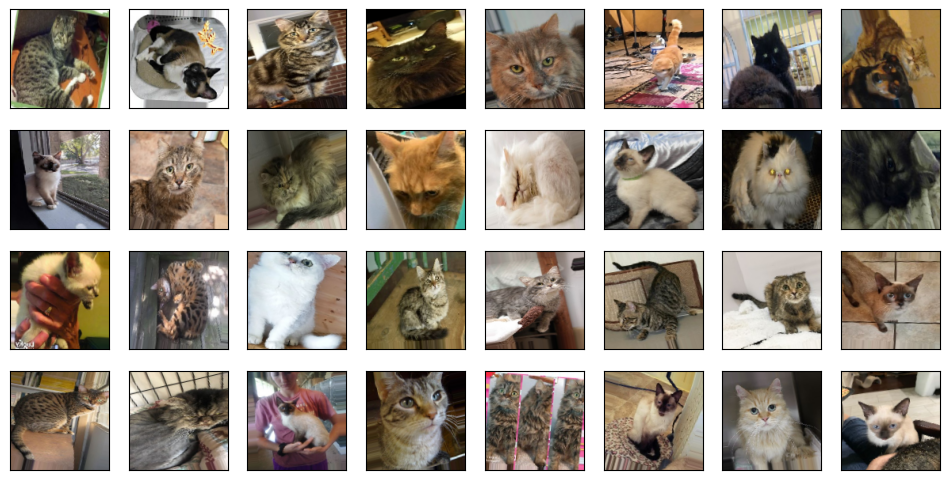

In [21]:
import matplotlib.pyplot as plt
batch_x, batch_y = next(train_generator)

# Visualize the images in the batch
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(12, 6),
                         subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(batch_x[i])
    # ax.set_title(f'Label: {batch_y[i]}')

plt.show()

In [6]:
val_generator = val_datagen.flow_from_directory(
    directory=val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
)

Found 2157 images belonging to 5 classes.


In [28]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
         directory='data/testing',
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

Found 2157 images belonging to 5 classes.


In [119]:
# Define the model architecture

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer='he_uniform', padding='same', input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), activation="relu", kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), activation="relu", kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation="relu", kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation="softmax")
])


In [120]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 125, 125, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 128)      0         
 2D)                                                             
                                                        

In [121]:
class myCallback(tf.keras.callbacks.Callback):
    def __init__(self, patience=5):
        super(myCallback, self).__init__()
        self.patience = patience
        self.best_val_loss = float('inf')
        self.counter = 0
        
    def on_epoch_end(self, epoch, logs={}):
        val_loss = logs.get('val_loss')
        
        if val_loss < self.best_val_loss:
            self.best_val_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                print(f'\nEarly stopping after epoch {epoch}')
                self.model.stop_training = True

callbacks = myCallback(patience=4)

In [122]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model.compile(
    optimizer=opt,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[callbacks]
)

In [ ]:
model.save('last_run.h5')

In [10]:
import os

data_dir = "images2"

images_count_per_class = []

for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    images_count_per_class.append(len(os.listdir(class_dir)))

print(images_count_per_class)

[2451, 1335, 3957, 379, 2671]


In [11]:
import pandas as pd

df = pd.DataFrame({
    "class_name": os.listdir(data_dir),
    "image_count": images_count_per_class
})

df

,class_name,image_count
0,Bengal,2451
1,Maine Coon,1335
2,Persian,3957
3,Scottish Fold,379
4,Siamese,2671


<Axes: xlabel='class_name'>

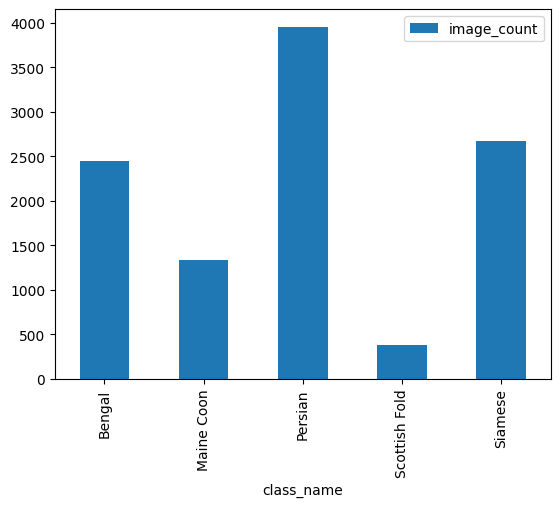

In [193]:
# plot the distribution of images per class
df.plot.bar(x="class_name", y="image_count")


In [67]:
#load cnn model
from tensorflow.keras.models import load_model
model = load_model('last_run.h5')

In [13]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.plot(model.history.history['accuracy'], label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.show()


AttributeError: 'NoneType' object has no attribute 'history'

In [29]:
import numpy as np
predictions = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_35948\3008931361.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)


68/68 [==============================] - 20s 296ms/step


In [30]:
true_classes = test_generator.classes
true_classes

array([0, 0, 0, ..., 4, 4, 4])

In [31]:
from sklearn.metrics import accuracy_score , classification_report , recall_score , precision_score,f1_score
average = 'weighted'

cnn_accuracy = accuracy_score(true_classes, predicted_classes)
cnn_recall = recall_score(true_classes, predicted_classes, average=average)
cnn_precision = precision_score(true_classes, predicted_classes, average=average)
cnn_f1 = f1_score(true_classes, predicted_classes, average=average)

print("CNN Accuracy: {:.3f}".format(cnn_accuracy))
print("CNN Recall: {:.3f}".format(cnn_recall))
print("CNN Precision: {:.3f}".format(cnn_precision))
print("CNN F1_Score: {:.3f}".format(cnn_f1))

CNN Accuracy: 0.618
CNN Recall: 0.618
CNN Precision: 0.661
CNN F1_Score: 0.597


In [32]:
#ROC AUC
from sklearn.metrics import roc_auc_score
print("ROC - AUC score is", roc_auc_score(test_generator.classes, predictions, multi_class='ovr'))

ROC - AUC score is 0.8470059226980959


0.9234602059180002
0.7671719873967066
0.8516685700958624
0.7843483829650976
0.9083804671148126


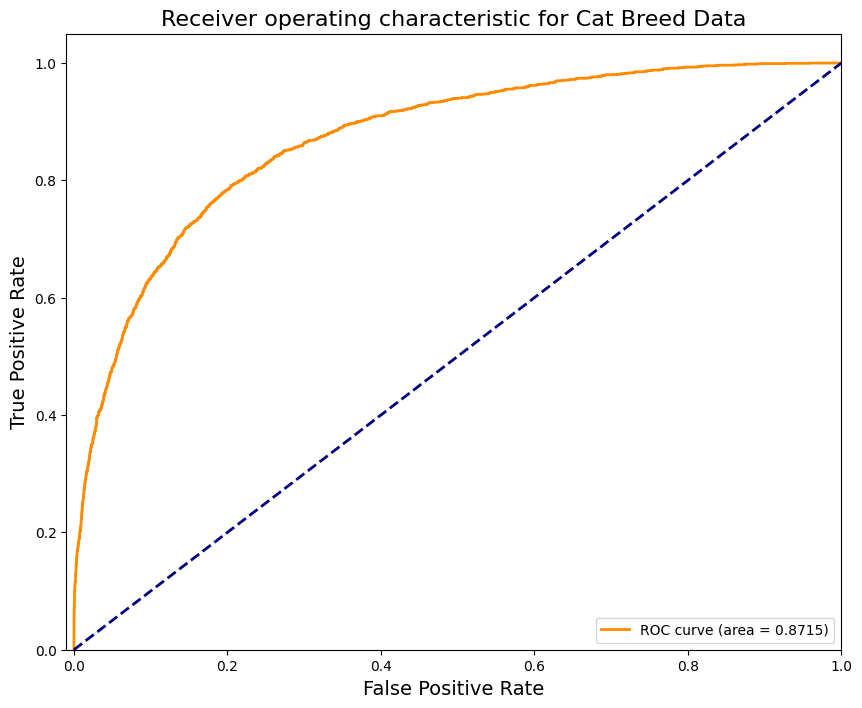

In [33]:
#plot roc curve
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc
from itertools import cycle
from scipy import interp

y_test = label_binarize(test_generator.classes, classes=[0, 1, 2, 3, 4])
n_classes = y_test.shape[1]

fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions[:, i])
    roc_auc = auc(fpr[i], tpr[i])
    print(roc_auc)

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), predictions.ravel())
roc_auc = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
            lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver operating characteristic for Cat Breed Data', fontsize=16)
plt.legend(loc="lower right")
plt.show()


In [34]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(test_generator.classes, predicted_classes))


              precision    recall  f1-score   support

           0       0.49      0.92      0.64       490
           1       0.44      0.19      0.27       267
           2       0.70      0.70      0.70       791
           3       0.80      0.05      0.10        75
           4       0.85      0.51      0.64       534

    accuracy                           0.62      2157
   macro avg       0.66      0.48      0.47      2157
weighted avg       0.66      0.62      0.60      2157



# Feature Selection and Extraction

In [35]:
import numpy as np
from tensorflow.keras.models import Model
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

layer_name = 'conv2d_63'  

feature_extractor_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

features = feature_extractor_model.predict(test_generator)

X = features.reshape(features.shape[0], -1)
selector = SelectKBest(f_classif, k=20000)
new_test_features= selector.fit_transform(X, np.array(test_generator.classes))
x_train, x_test, y_train, y_test = train_test_split(new_test_features, np.array(test_generator.classes), test_size= 0.15)


68/68 [==============================] - 22s 316ms/step


# KNN


In [37]:
from sklearn.metrics import accuracy_score , classification_report , recall_score , precision_score,f1_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

average = 'weighted'

knn.fit(x_train, y_train)
test_pred = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, test_pred)
knn_recall = recall_score(y_test, test_pred, average=average)
knn_precision = precision_score(y_test, test_pred, average=average)
knn_f1 = f1_score(y_test, test_pred, average=average)
x_test


print("KNN Accuracy: {:.3f}".format(knn_accuracy))
print("KNN Recall: {:.3f}".format(knn_recall))
print("KNN Precision: {:.3f}".format(knn_precision))
print("KNN F1_Score: {:.3f}".format(knn_f1))


print("Training set score: {:.2f}".format(knn.score(x_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(x_test, y_test)))
print("\nClassification Report:")
print(classification_report(y_test,test_pred))
#{'Bengal': 0, 'Maine Coon': 1, 'Persian': 2, 'Scottish Fold': 3, 'Siamese': 4}

KNN Accuracy: 0.515
KNN Recall: 0.515
KNN Precision: 0.497
KNN F1_Score: 0.468
Training set score: 0.69
Test set score: 0.52

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.54      0.54        70
           1       0.41      0.23      0.29        48
           2       0.53      0.84      0.65       129
           3       0.00      0.00      0.00         8
           4       0.50      0.14      0.22        69

    accuracy                           0.52       324
   macro avg       0.40      0.35      0.34       324
weighted avg       0.50      0.52      0.47       324



# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

logmodel.fit(x_train,y_train)

test_pred = logmodel.predict(x_test)
log_accuracy = accuracy_score(y_test, test_pred)
log_recall = recall_score(y_test, test_pred, average=average)
log_precision = precision_score(y_test, test_pred, average=average)
log_f1 = f1_score(y_test, test_pred, average=average)


print("Logistic Regression Accuracy: {:.3f}".format(log_accuracy))
print("Logistic Regression Recall: {:.3f}".format(log_recall))
print("Logistic Regression Precision: {:.3f}".format(log_precision))
print("Logistic Regression F1_Score: {:.3f}".format(log_f1))
print("\nClassification Report:")
print(classification_report(y_test,test_pred))
#{'Bengal': 0, 'Maine Coon': 1, 'Persian': 2, 'Scottish Fold': 3, 'Siamese': 4}

Logistic Regression Accuracy: 0.664
Logistic Regression Recall: 0.664
Logistic Regression Precision: 0.660
Logistic Regression F1_Score: 0.658

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.70      0.67        70
           1       0.54      0.46      0.49        48
           2       0.76      0.75      0.75       129
           3       0.50      0.12      0.20         8
           4       0.60      0.67      0.63        69

    accuracy                           0.66       324
   macro avg       0.61      0.54      0.55       324
weighted avg       0.66      0.66      0.66       324



c:\Users\Admin\anaconda3\envs\AI\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SVM

In [42]:
from sklearn.svm import SVC

model_svm=SVC(kernel="rbf")
model_svm.fit(x_train,y_train)

test_pred=model_svm.predict(x_test)
svm_accuracy = accuracy_score(y_test, test_pred)
svm_recall = recall_score(y_test, test_pred, average=average)
svm_precision = precision_score(y_test, test_pred, average=average)
svm_f1 = f1_score(y_test, test_pred, average=average)


print("SVM Accuracy: {:.3f}".format(svm_accuracy))
print("SVM Recall: {:.3f}".format(svm_recall))
print("SVM Precision: {:.3f}".format(svm_precision))
print("SVM F1_Score: {:.3f}".format(svm_f1))
print("\nClassification Report:")
print(classification_report(y_test,test_pred))
#{'Bengal': 0, 'Maine Coon': 1, 'Persian': 2, 'Scottish Fold': 3, 'Siamese': 4}


SVM Accuracy: 0.670
SVM Recall: 0.670
SVM Precision: 0.656
SVM F1_Score: 0.640

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.77      0.70        70
           1       0.69      0.23      0.34        48
           2       0.67      0.85      0.75       129
           3       0.00      0.00      0.00         8
           4       0.69      0.61      0.65        69

    accuracy                           0.67       324
   macro avg       0.54      0.49      0.49       324
weighted avg       0.66      0.67      0.64       324



c:\Users\Admin\anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\anaconda3\envs\AI\lib\site-pa

# MLP

In [43]:
from sklearn.neural_network import MLPClassifier
mpl = MLPClassifier(random_state=48,hidden_layer_sizes=(150,100,50), max_iter=200,activation = 'relu',solver='adam', verbose=2)
mpl.fit(x_train, y_train)

Iteration 1, loss = 5.99881410
Iteration 2, loss = 2.30807910
Iteration 3, loss = 1.15874795
Iteration 4, loss = 0.92956692
Iteration 5, loss = 0.76860418
Iteration 6, loss = 0.65060093
Iteration 7, loss = 0.56417210
Iteration 8, loss = 0.49441696
Iteration 9, loss = 0.39269781
Iteration 10, loss = 0.32792281
Iteration 11, loss = 0.30326587
Iteration 12, loss = 0.23485317
Iteration 13, loss = 0.21068166
Iteration 14, loss = 0.18314124
Iteration 15, loss = 0.15086460
Iteration 16, loss = 0.13975688
Iteration 17, loss = 0.13275245
Iteration 18, loss = 0.11546237
Iteration 19, loss = 0.08937435
Iteration 20, loss = 0.08061778
Iteration 21, loss = 0.07595292
Iteration 22, loss = 0.05516598
Iteration 23, loss = 0.04530538
Iteration 24, loss = 0.03843524
Iteration 25, loss = 0.03260995
Iteration 26, loss = 0.02907818
Iteration 27, loss = 0.02608372
Iteration 28, loss = 0.02424322
Iteration 29, loss = 0.02188184
Iteration 30, loss = 0.02008172
Iteration 31, loss = 0.01869026
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(150, 100, 50), random_state=48, verbose=2)

In [44]:
test_pred= mpl.predict(x_test)
mlp_accuracy = accuracy_score(y_test, test_pred)
mlp_recall = recall_score(y_test, test_pred, average=average)
mlp_precision = precision_score(y_test, test_pred, average=average)
mlp_f1 = f1_score(y_test, test_pred, average=average)


print("MLP Accuracy: {:.3f}".format(mlp_accuracy))
print("MLP Recall: {:.3f}".format(mlp_recall))
print("MLP Precision: {:.3f}".format(mlp_precision))
print("MLP F1_Score: {:.3f}".format(mlp_f1))
print("\nClassification Report:")
print(classification_report(y_test,test_pred))
#{'Bengal': 0, 'Maine Coon': 1, 'Persian': 2, 'Scottish Fold': 3, 'Siamese': 4}

MLP Accuracy: 0.627
MLP Recall: 0.627
MLP Precision: 0.619
MLP F1_Score: 0.620

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.71      0.67        70
           1       0.49      0.42      0.45        48
           2       0.74      0.69      0.71       129
           3       0.00      0.00      0.00         8
           4       0.54      0.64      0.58        69

    accuracy                           0.63       324
   macro avg       0.48      0.49      0.48       324
weighted avg       0.62      0.63      0.62       324



# Charts


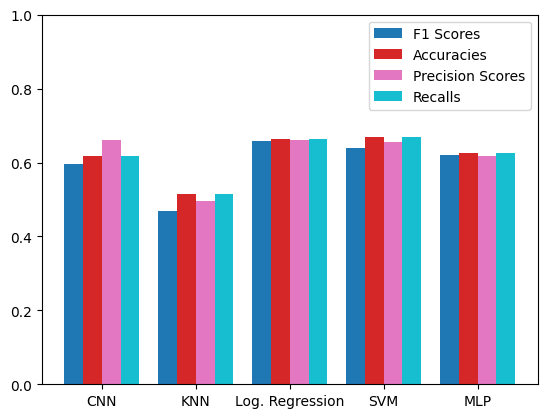

In [56]:
import matplotlib.pyplot as plt

# Define the models and their metrics
models = ["CNN", "KNN", "Log. Regression", "SVM", "MLP"]
accuracies = [cnn_accuracy, knn_accuracy, log_accuracy, svm_accuracy, mlp_accuracy]
f1_scores = [cnn_f1, knn_f1, log_f1, svm_f1, mlp_f1]
precision_scores = [cnn_precision, knn_precision, log_precision, svm_precision, mlp_precision]
recalls = [cnn_recall, knn_recall, log_recall, svm_recall, mlp_recall]

bar_width = 0.2

x_pos = np.arange(len(models))

colors = plt.cm.tab10(np.linspace(0, 1, 4))

plt.bar(x_pos - 1.5 * bar_width, f1_scores, width=bar_width, color=colors[0], label='F1 Scores')
plt.bar(x_pos - 0.5 * bar_width, accuracies, width=bar_width, color=colors[1], label='Accuracies')
plt.bar(x_pos + 0.5 * bar_width, precision_scores, width=bar_width, color=colors[2], label='Precision Scores')
plt.bar(x_pos + 1.5 * bar_width, recalls, width=bar_width, color=colors[3], label='Recalls')

plt.xticks(x_pos, models)
plt.ylim([0, 1])
plt.legend()
plt.show()

# Predictioing my cat's breed

In [51]:
class_names = list(test_generator.classes)
class_names = {v: k for k, v in test_generator.class_indices.items()}
classes = list(class_names.values())
classes

['Bengal', 'Maine Coon', 'Persian', 'Scottish Fold', 'Siamese']

my_cats\bengal.png
1/1 [==============================] - 0s 39ms/step


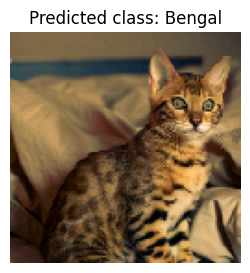

my_cats\coco.jpg
1/1 [==============================] - 0s 41ms/step


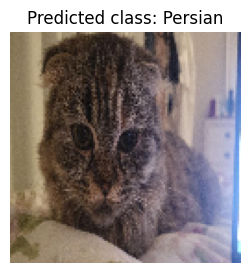

my_cats\coco2.jpg
1/1 [==============================] - 0s 134ms/step


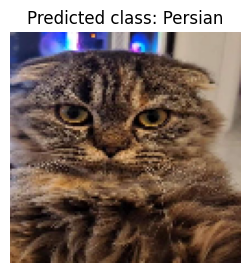

my_cats\coco3.jpg
1/1 [==============================] - 0s 34ms/step


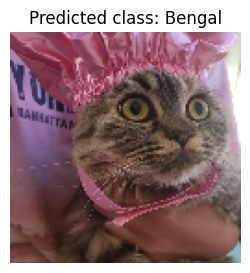

my_cats\maincoon.png
1/1 [==============================] - 0s 35ms/step


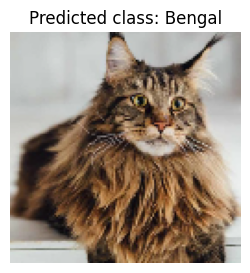

my_cats\nala.jpg
1/1 [==============================] - 0s 34ms/step


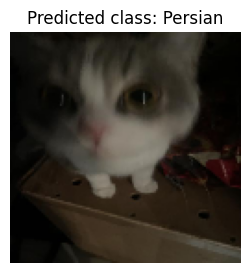

my_cats\nala2.jpg
1/1 [==============================] - 0s 34ms/step


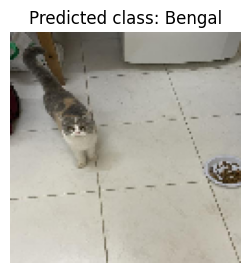

my_cats\nala3.jpeg
1/1 [==============================] - 0s 33ms/step


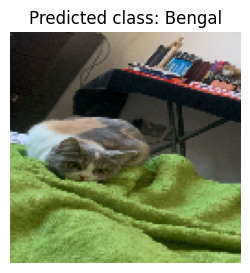

my_cats\nala4.jpg
1/1 [==============================] - 0s 40ms/step


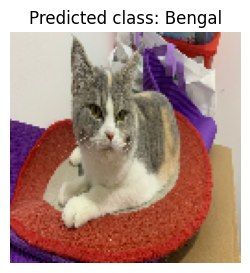

my_cats\nala5.jpg
1/1 [==============================] - 0s 31ms/step


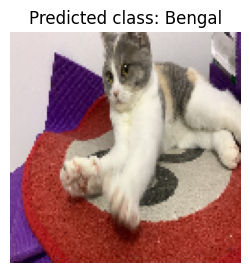

my_cats\nala6.jpg
1/1 [==============================] - 0s 30ms/step


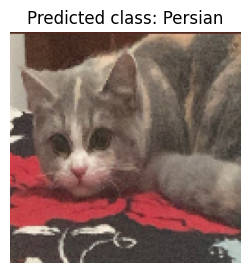

my_cats\nawf.jpg
1/1 [==============================] - 0s 32ms/step


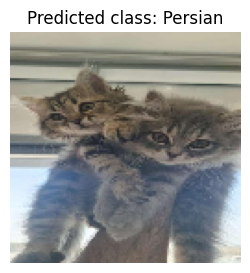

my_cats\peanut.jpg
1/1 [==============================] - 0s 35ms/step


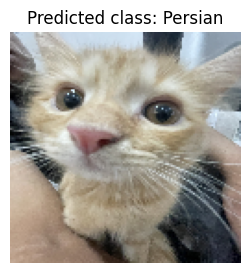

my_cats\persian.png
1/1 [==============================] - 0s 32ms/step


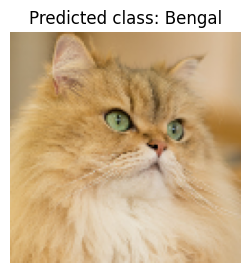

my_cats\scottish.png
1/1 [==============================] - 0s 35ms/step


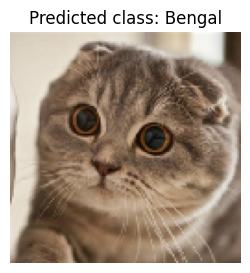

my_cats\siamese.png
1/1 [==============================] - 0s 37ms/step


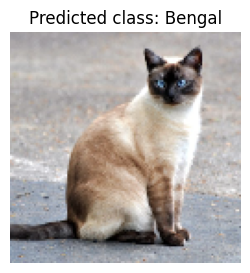

In [65]:
import numpy as np
from tensorflow.keras.preprocessing import image


dir = 'my_cats'
for i in os.listdir(dir):
    img_path = os.path.join(dir, i)
    print(img_path)

    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)

    img_array = img_array/255.0

    # predictions = model.predict(img_array)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    plt.figure(figsize=(3, 3))
    plt.imshow(img)
    plt.title(f"Predicted class: {predicted_class}")
    plt.axis("off")
    plt.show()